# Carga de Librerías y Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KneighborsClassifier
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv('Train_Loan_Home.csv')
df_predecir = pd.read_csv('Test_Loan_Home.csv')

# Limpieza de Datos

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
df_train['Loan_ID'] = df_train['Loan_ID'].str[4:]

In [5]:
genero = {'Female' : 0 , 'Male' : 1}
df_train.Gender = df_train.Gender.map(genero)
df_train.Gender.fillna(0, inplace=True)

In [6]:
casado = {'No' : 0 , 'Yes' : 1}
df_train.Married = df_train.Married.map(casado)
df_train.Married.fillna(0, inplace=True)

In [7]:
graduado = {'Not Graduate' : 0 , 'Graduate' : 1}
df_train.Education = df_train.Education.map(graduado)
df_train.Education.fillna(0, inplace=True)

In [8]:
independiente = {'No' : 0 , 'Yes' : 1}
df_train.Self_Employed = df_train.Self_Employed.map(independiente)
df_train.Self_Employed.fillna(0, inplace=True)

In [9]:
# historial_creditos = {'No' : 0 , 'Yes' : 1}
df_train.Credit_History.fillna(value = 0.0, inplace = True)
df_train.Credit_History = df_train.Credit_History.astype(int)
df_train.Credit_History.fillna(0, inplace=True)

In [10]:
prestamo = {'N' : 0 , 'Y' : 1}
df_train.Loan_Status = df_train.Loan_Status.map(prestamo)

In [11]:
d_zona = {'Urban' : 0, 'Semiurban' : 1, 'Rural' : 2}
df_train['Property_Area'] = df_train['Property_Area'].map(d_zona)

In [12]:
d_dependientes = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_train['Dependents'] = df_train['Dependents'].map(d_dependientes)

In [13]:
df_train.dropna(inplace = True);

In [14]:
df_train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1,2,0
2,1005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1,0,1
3,1006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1,0,1


# Se debe limpiar el dataset a predecir también.

In [15]:
df_predecir.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
df_predecir['Loan_ID'] = df_predecir['Loan_ID'].str[4:]

genero = {'Female' : 0 , 'Male' : 1}
df_predecir.Gender = df_predecir.Gender.map(genero)
df_predecir.Gender.fillna(0, inplace=True)

casado = {'No' : 0 , 'Yes' : 1}
df_predecir.Married = df_predecir.Married.map(casado)
df_predecir.Married.fillna(0, inplace=True)

graduado = {'Not Graduate' : 0 , 'Graduate' : 1}
df_predecir.Education = df_predecir.Education.map(graduado)
df_predecir.Education.fillna(0, inplace=True)

independiente = {'No' : 0 , 'Yes' : 1}
df_predecir.Self_Employed = df_predecir.Self_Employed.map(independiente)
df_predecir.Self_Employed.fillna(0, inplace=True)

df_predecir.Credit_History.fillna(value = 0.0, inplace = True)
df_predecir.Credit_History = df_predecir.Credit_History.astype(int)
df_predecir.Credit_History.fillna(0, inplace=True)

d_zona = {'Urban' : 0, 'Semiurban' : 1, 'Rural' : 2}
df_predecir['Property_Area'] = df_predecir['Property_Area'].map(d_zona)

d_dependientes = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_predecir['Dependents'] = df_predecir['Dependents'].map(d_dependientes)

df_predecir.dropna(inplace = True);

Ya fueron limpiados ambos datasets por lo que es hora de comenzar con los modelos de predicción.

### Voy a estudiar las correlaciones entre las variables.

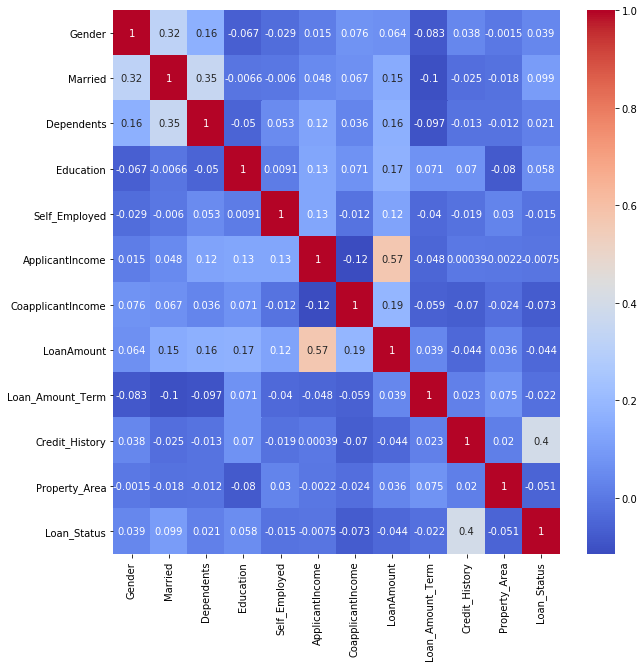

In [17]:
import seaborn as sns
fig = plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot = True) 

## Voy a Separar el data set de train en 2 para poder entrenar y testear.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df_train.drop(['Loan_Status'], axis = 1) , df_train['Loan_Status'] , test_size = 0.2)

# Modelos de Machine Learning

Linear Regression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict_train = lin_reg.predict(X_train)
y_predict_test = lin_reg.predict(X_test)

In [20]:
# Como quiero un sí o un no, voy a tomar un corte. Si es mayor a 0,6, será Sí, sino será No.

y_predict_train[y_predict_train < 0.6] = 0
y_predict_train[y_predict_train >= 0.6] = 1
m = (y_predict_train == y_train)
m.sort_index(ascending = False)
m.value_counts()

True     335
False    117
Name: Loan_Status, dtype: int64

In [21]:
y_predict_test[y_predict_test < 0.6] = 0
y_predict_test[y_predict_test >= 0.6] = 1
mt = (y_predict_test == y_test)
mt.sort_index(ascending = False)
mt.value_counts()

True     99
False    15
Name: Loan_Status, dtype: int64

In [22]:
lin_train_mse = mean_squared_error(y_train, y_predict_train)
lin_test_mse = mean_squared_error(y_test, y_predict_test)

print('El error cuadrado de la regresión lineal en el conjunto entrenado es: ', lin_test_mse)
print('El error cuadrado de la regresión lineal en el conjunto de testeo es: ', lin_train_mse)

El error cuadrado de la regresión lineal en el conjunto entrenado es:  0.13157894736842105
El error cuadrado de la regresión lineal en el conjunto de testeo es:  0.2588495575221239


#

Gradiente Descendiente (regresión).

In [23]:
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)
y_predict_train_sgd = sgd_reg.predict(X_train)
y_predict_test_sgd = sgd_reg.predict(X_test)

In [24]:
y_predict_train_sgd[y_predict_train_sgd < 0.6] = 0
y_predict_train_sgd[y_predict_train_sgd >= 0.6] = 1
m_sgd = (y_predict_train_sgd == y_train)
m_sgd.sort_index(ascending = False)
m_sgd.value_counts()

True     259
False    193
Name: Loan_Status, dtype: int64

In [25]:
y_predict_test_sgd[y_predict_test < 0.6] = 0
y_predict_test_sgd[y_predict_test >= 0.6] = 1
mt = (y_predict_test == y_test)
mt.sort_index(ascending = False)
mt.value_counts()

True     99
False    15
Name: Loan_Status, dtype: int64

In [26]:
lin_train_mse_sgd = mean_squared_error(y_train, y_predict_train_sgd)
lin_test_mse_sgd = mean_squared_error(y_test, y_predict_test_sgd)

print('El error cuadrado de la regresión lineal en el conjunto entrenado es: ', lin_test_mse_sgd)
print('El error cuadrado de la regresión lineal en el conjunto de testeo es: ', lin_train_mse_sgd)

El error cuadrado de la regresión lineal en el conjunto entrenado es:  0.13157894736842105
El error cuadrado de la regresión lineal en el conjunto de testeo es:  0.4269911504424779


#

Decision Tree

In [27]:
clf = DecisionTreeRegressor()
model = clf.fit(X_train, y_train)
y_predict_train_tree = clf.predict(X_train)
y_predict_test_tree = clf.predict(X_test)

In [28]:
# y_predict_train_tree[y_predict_train_tree < 0.6] = 0
# y_predict_train_tree[y_predict_train_tree >= 0.6] = 1
# m_tree = (y_predict_train_tree == y_train)
# m_tree.sort_index(ascending = False)
# m_tree.value_counts()

In [29]:
# y_predict_test_tree[y_predict_test_tree < 0.6] = 0
# y_predict_test_tree[y_predict_test_tree >= 0.6] = 1
# mt = (y_predict_test == y_test)
# mt.sort_index(ascending = False)
# mt.value_counts()

In [30]:
lin_train_mse_tree = mean_squared_error(y_train, y_predict_train_tree)
lin_test_mse_tree = mean_squared_error(y_test, y_predict_test_tree)

print('El error cuadrado de la regresión lineal en el conjunto entrenado es: ', lin_test_mse_tree)
print('El error cuadrado de la regresión lineal en el conjunto de testeo es: ', lin_train_mse_tree)

El error cuadrado de la regresión lineal en el conjunto entrenado es:  0.2894736842105263
El error cuadrado de la regresión lineal en el conjunto de testeo es:  0.0


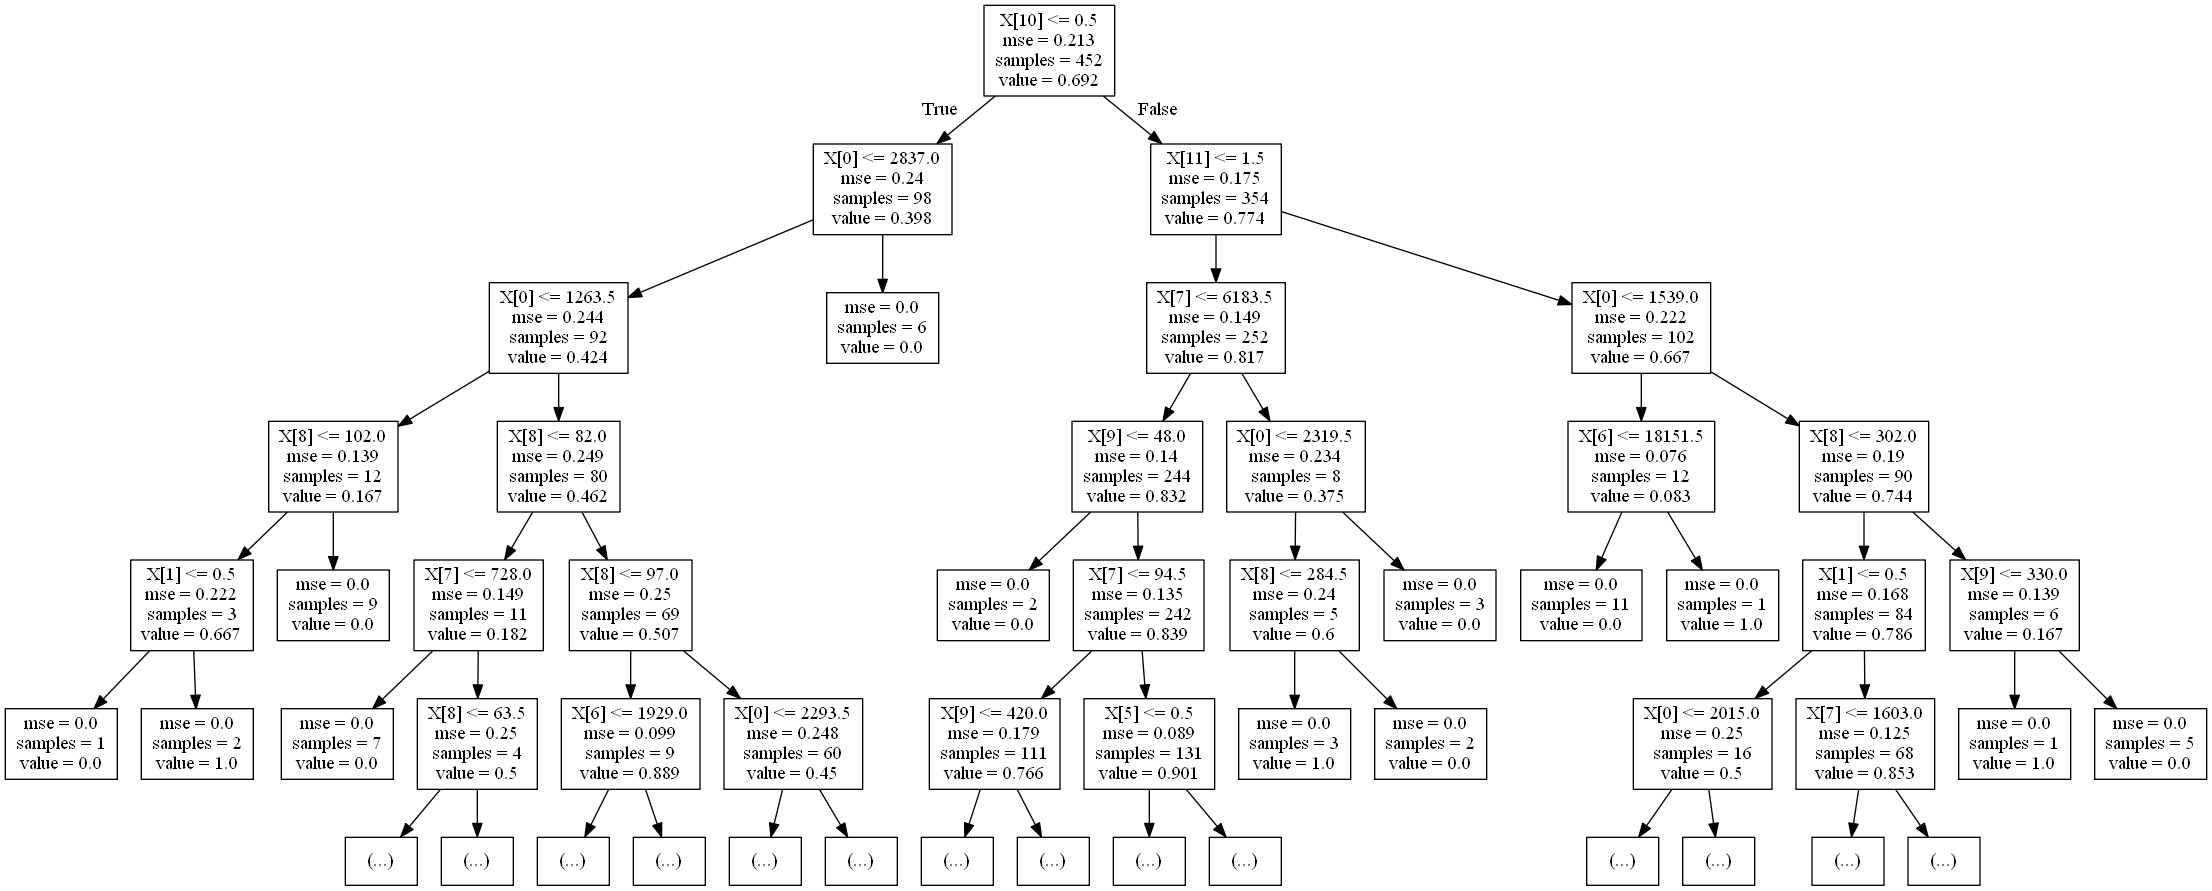

In [31]:
# Para graficar el árbol:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

# fig = plt.figure(figsize = (20,20))
dot_data = tree.export_graphviz(clf, max_depth = 5)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
# graph.write_pdf("tree.pdf")

Si nos guiamos por los errores en los datasets de testeo, el mejor modelo de Machine Learning
para este caso es el árbol de decisión. Por lo cual, para asegurarnos, correremos sobre los datos
que queremos predecir tanto con el algoritmo de regresión lineal como el árbol de decisión.

### Corro los datos a predecir si dar o no el préstamo con ambos algoritmos

In [32]:
predict_lr = lin_reg.predict(df_predecir)

predict_dt = clf.predict(df_predecir)

In [33]:
predict_lr[predict_lr < 0.6] = 0
predict_lr[predict_lr >= 0.6] = 1

In [34]:
predict_lr = pd.Series(predict_lr, name = 'Loan_Status')
predict_dt = pd.Series(predict_dt, name = 'Loan_Status')

df_predecir.reset_index(inplace = True)

df_predecir_lr = df_predecir.join(predict_lr)
df_predecir_dt = df_predecir.join(predict_dt)

In [35]:
df_predecir_lr

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term_Months,Credit_History,Property_Area,Loan_Status
0,0,1015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1,0,1.0
1,1,1022,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1,0,1.0
2,2,1031,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1,0,1.0
3,3,1035,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0,0,0.0
4,4,1051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1,0,1.0
5,5,1054,1.0,1,0.0,0,1.0,2165,3422,152.0,360.0,1,0,1.0
6,6,1055,0.0,0,1.0,0,0.0,2226,0,59.0,360.0,1,1,1.0
7,7,1056,1.0,1,2.0,0,0.0,3881,0,147.0,360.0,0,2,0.0
8,8,1059,1.0,1,2.0,1,0.0,13633,0,280.0,240.0,1,0,1.0
9,9,1067,1.0,0,0.0,0,0.0,2400,2400,123.0,360.0,1,1,1.0


In [36]:
df_predecir_dt

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term_Months,Credit_History,Property_Area,Loan_Status
0,0,1015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1,0,0.0
1,1,1022,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1,0,1.0
2,2,1031,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1,0,1.0
3,3,1035,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0,0,1.0
4,4,1051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1,0,1.0
5,5,1054,1.0,1,0.0,0,1.0,2165,3422,152.0,360.0,1,0,1.0
6,6,1055,0.0,0,1.0,0,0.0,2226,0,59.0,360.0,1,1,1.0
7,7,1056,1.0,1,2.0,0,0.0,3881,0,147.0,360.0,0,2,0.0
8,8,1059,1.0,1,2.0,1,0.0,13633,0,280.0,240.0,1,0,1.0
9,9,1067,1.0,0,0.0,0,0.0,2400,2400,123.0,360.0,1,1,1.0


In [38]:
comparador = (df_predecir_lr['Loan_Status'] == df_predecir_dt['Loan_Status'])
comparador.value_counts()

True     240
False    107
Name: Loan_Status, dtype: int64

#### Esto quiere decir que en 240 clientes ambos métodos nos dieron el mismo resultado, es decir,
#### otorgar el crédito o no otorgarlo. Mientras que para 107 clientes, no concordaron los resultados.

#

In [47]:
aprobados_lr = (df_predecir_lr['Loan_Status'] == 1)
print('La cantidad de préstamos otorgados por el algoritmo de regresión lineal es de: ', aprobados_lr.sum())
aprobados_dt = (df_predecir_dt['Loan_Status'] == 1)
print('La cantidad de préstamos otorgados por el algoritmo del árbol de decisión es de: ', aprobados_dt.sum())

La cantidad de préstamos otorgados por el algoritmo de regresión lineal es de:  262
La cantidad de préstamos otorgados por el algoritmo del árbol de decisión es de:  239


In [55]:
suma_prestada_lr = df_predecir_lr.groupby(['Loan_Status'])['LoanAmount'].sum() * 1000
suma_prestada_dt = df_predecir_dt.groupby(['Loan_Status'])['LoanAmount'].sum() * 1000

print('La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo de regresión lineal es de: US$ ', suma_prestada_lr[1])
print('La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo del árbol de decisión es de: US$ ', suma_prestada_dt[1])

La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo de regresión lineal es de: US$  35821000.0
La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo del árbol de decisión es de: US$  32828000.0
